In [73]:
# Importing the necessary libraries
import numpy as np
from numpy import pi
from scipy.linalg import expm, sinm, cosm, sqrtm
import matplotlib.pyplot as plt

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.circuit.library.standard_gates import XGate, MCXGate
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Statevector
from qiskit.tools.jupyter import *
from qiskit.visualization import *

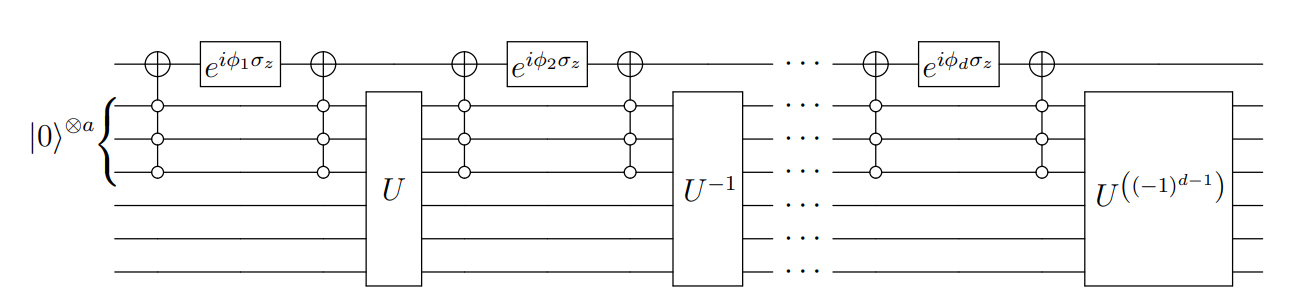

In [74]:
def U(A):
    """
    block encoding
    """

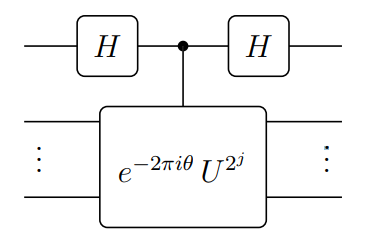

In [115]:
def QSVT(phi_vec, n):
    nqubits = 2*n+1
    q = QuantumRegister(nqubits, 'q')
    circuit = QuantumCircuit(q)

    # calculate anti-toffoli gate
    anti_gate  = MCXGate(n, ctrl_state='0'*n)
    target_list = [q[i] for i in range(1, n+1)]
    target_list.append(q[0])

    circuit.append(anti_gate , target_list)
    circuit.rz(-2*phi_vec[0], q[0])
    circuit.append(anti_gate , target_list)

    for k in range(1, len(phi_vec)):
        

        circuit.append(anti_gate , target_list)

        circuit.rz(-2*phi_vec[k], q[0])

        circuit.append(anti_gate , target_list)
    return circuit

## Example BB1
$ \vec{\phi} = (\pi/2, -\eta, 2\eta, 0, -2\eta, \eta) $ with $ \eta = \frac{1}{2} \cos^{-1}(-1/4) $

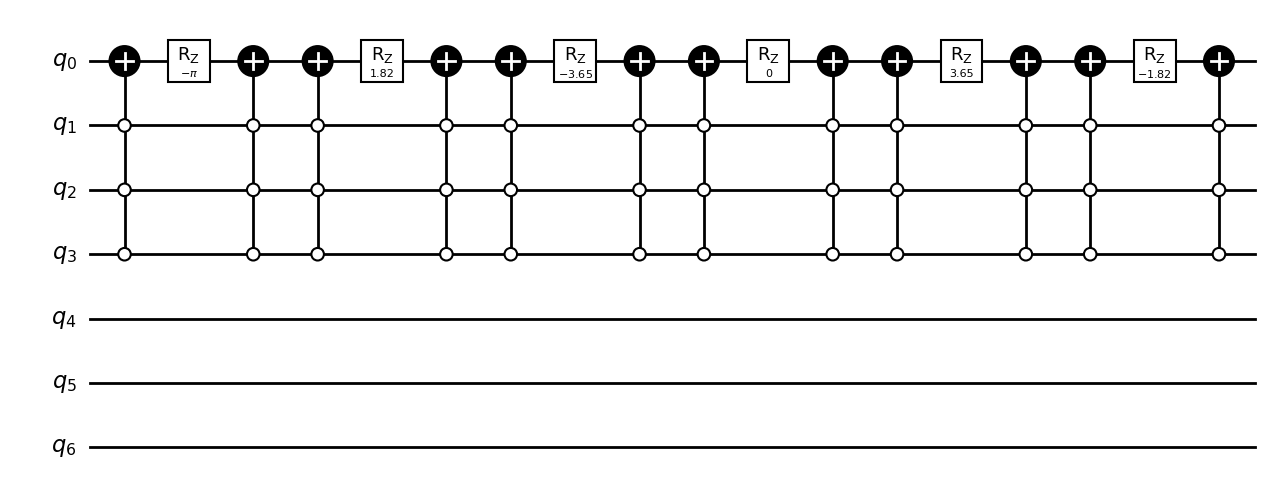

In [116]:
eta = 1/2 * np.arccos(-1/4)
phi_vec_bb1 = [np.pi/2, -eta, 2*eta, 0, -2*eta, eta]

qc = QSVT(phi_vec_bb1, 3)
qc.draw('mpl', style="bw")

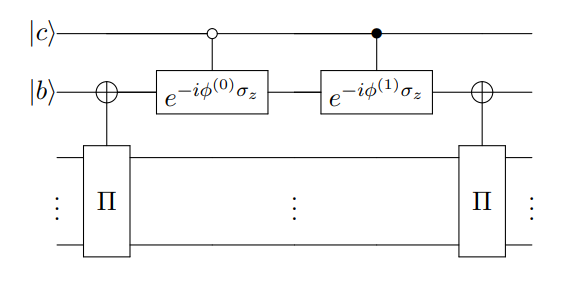

### Controlled QEVT

In [110]:
X_gate = np.array([[0, 1], [1, 0]], dtype = 'complex_')
Y_gate = np.array([[0, -1j], [1j, 0]], dtype = 'complex_')
Z_gate = np.array([[1, 0], [0, -1]], dtype = 'complex_')

H = X_gate @ X_gate @ Y_gate @ Z_gate + X_gate @ Y_gate @ Z_gate + Y_gate @ Z_gate + Z_gate @ X_gate



def U(H):
    matrix = np.kron(Z_gate, H) + np.kron(X_gate, np.sqrt(np.eye(2) - sqrtm(H)))
    print(matrix)
    gate = UnitaryGate(matrix)
    return gate

In [113]:
def QSVT(phi_vec, n):
    nqubits = 2*n+1
    q = QuantumRegister(nqubits, 'q')
    circuit = QuantumCircuit(q)

    # calculate anti-toffoli gate
    anti_gate  = MCXGate(n, ctrl_state='0'*n)
    target_list = [q[i+1] for i in range(1, n+1)]
    target_list.append(q[1])

    # create controlled Z-rotation gate
    qc1 = QuantumCircuit(1, name="$e^{-i\phi Z}$")
    qc1.rz(-2*phi_vec[0], 0)
    c_rz = qc1.to_gate().control(1)
    anti_c_rz = qc1.to_gate().control(1, ctrl_state='0')

    circuit.append(anti_gate , target_list)
    circuit.append(anti_c_rz, [0, 1])
    circuit.append(c_rz, [0, 1])
    circuit.append(anti_gate , target_list)

    for k in range(1, len(phi_vec)):
        

        circuit.append(anti_gate , target_list)

        circuit.append(anti_c_rz, [0, 1])

        #circuit.append(U(H), [2,3,4])

        circuit.append(c_rz, [0, 1])

        circuit.append(anti_gate , target_list)
    return circuit

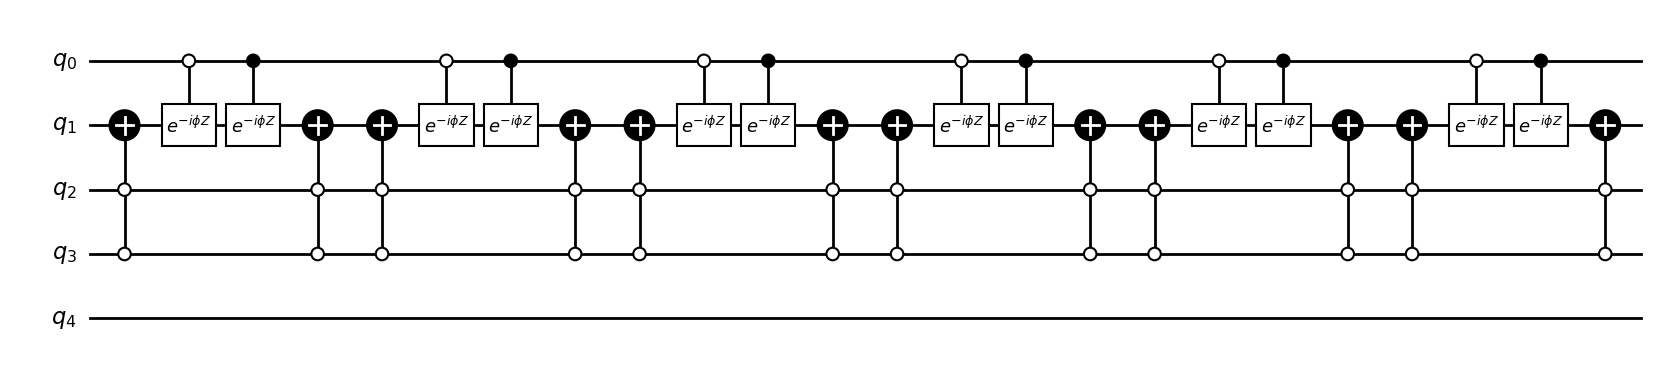

In [114]:
eta = 1/2 * np.arccos(-1/4)
phi_vec_bb1 = [np.pi/2, -eta, 2*eta, 0, -2*eta, eta]

qc = QSVT(phi_vec_bb1, 2)
qc.draw('mpl', style="bw")